In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
def InnerProduct(f,g,a,b,n):
    delta=float((b-a)/n)
    I=f[0]*g[0]+4.0*f[1]*g[1]+f[n]*g[n]
    for i in range(1,int(n/2)):
        I+=4.0*f[2*i+1]*g[2*i+1]+2.0*f[2*i]*g[2*i]
    return I*delta/3

def Gram_Schmidt(V,u):
    m=len(V)
    W=u
    for i in range(m):
        W-=InnerProduct(u,V[i],-1.,1.,N)*V[i]
    v=(1/np.sqrt(InnerProduct(W,W,-1.0,1.0,N)))*W
    return np.concatenate((V,[v]))
def PolyEXP(V,f):
    m=len(V)
    elements=np.empty([m,1])
    for i in range(m):
        elements[i]=InnerProduct(V[i],f,-1.,1.,N)
    return elements

In [58]:
n=3

N=200
a=-1.
b=1.
delta_x=(b-a)/N
x=np.linspace(a,b,N+1)
U=np.array([x**0])
for i in range(1,n+1):
    U=np.concatenate((U,[x**i]))
v=(1/np.sqrt(InnerProduct(U[0],U[0],-1.,1.,N)))*U[0]
V=np.array([v])
for i in range(1,len(U)):
    V=Gram_Schmidt(V,U[i])
f=np.sin(x)
elements=PolyEXP(V,f)

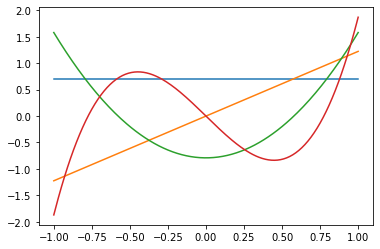

In [59]:
for i in range(0,n+1):
    plt.plot(x,V[i])

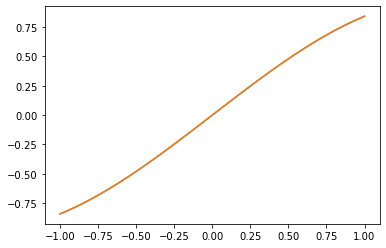

In [60]:
plt.plot(x,f)
hn=np.dot(np.transpose(V),elements)
plt.plot(x,hn)